<a href="https://colab.research.google.com/github/sujalkumeriya59/Machine-Learning/blob/main/bonus_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

             3         5         7  Linear Regression
MAE   0.161111  0.158889  0.167460           0.240019
MSE   0.104321  0.092667  0.093991           0.100618
RMSE  0.322988  0.304412  0.306579           0.317203


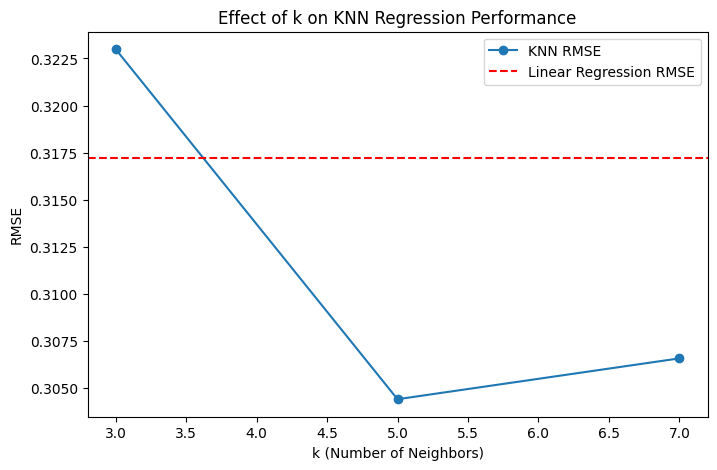

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv("customer_churn.csv")

# Preprocess data (assuming target column is 'Churn' and we drop categorical features for simplicity)
df = df.select_dtypes(include=[np.number]).dropna()

# Define features and target variable
X = df.drop(columns=['Churn'], errors='ignore')  # Exclude 'Churn' if present
y = df['Churn'] if 'Churn' in df.columns else df.iloc[:, -1]  # Assuming target is 'Churn' or last column

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize list for results
results = {}

# Experiment with different values of k
k_values = [3, 5, 7]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    # Compute evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results[k] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# Train and evaluate Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Compute metrics for Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

results['Linear Regression'] = {'MAE': mae_lr, 'MSE': mse_lr, 'RMSE': rmse_lr}

# Print results
print(pd.DataFrame(results))

# Visualize the effect of k on RMSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, [results[k]['RMSE'] for k in k_values], marker='o', linestyle='-', label='KNN RMSE')
plt.axhline(y=rmse_lr, color='r', linestyle='--', label='Linear Regression RMSE')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('RMSE')
plt.title('Effect of k on KNN Regression Performance')
plt.legend()
plt.show()
